# 2110446 DATA SCIENCE AND DATA ENGINEERING

## **Unit 03:** Traditional Machine Learning

- **Author:** Worralop Srichainont
- **Year:** 2025 (Semester 2)

## **Homework:** Decision Tree

Please study the [demo notebook](https://colab.research.google.com/github/pvateekul/2110446_DSDE_2025s2/blob/main/code/Week03_ML/1_Decision_Trees_Random_Forests_v3.ipynb) and create a report and export it as a PDF file, comparing:
- Decision Tree model with adjusted parameters
- Random Forest model with adjusted parameters

**Objective:** Achieve the highest possible macro-F1 score with proper interpretation.

# **Task 0:** Data Preparation

## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Data Resources

File URL

In [2]:
KYPHOSIS_URL = "https://raw.githubusercontent.com/reisenx/2110446-DATA-SCI-ENG/refs/heads/main/03-Traditional-ML/Homework/homework_03/code/kyphosis.csv"

Load Files

In [3]:
KYPHOSIS_DF = pd.read_csv(KYPHOSIS_URL)

In [4]:
dataset_rows = KYPHOSIS_DF.shape[0]
dataset_cols = KYPHOSIS_DF.shape[1]

print(f"The dataset has {dataset_rows} rows and {dataset_cols} columns.")

The dataset has 81 rows and 4 columns.


## Columns Description
- `Kyphosis` is the target column.
    - `absent` means the spine has not deformed.
    - `present` means the spine has deformed.
- `Age` is the age of the patient (months).
- `Number` is the total number of vertebrae (spine bones) that were involved in the surgical procedure.
- `Start` is the index of the topmost vertebra (spine bone) that was operated on.

In [5]:
KYPHOSIS_DF.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


## Exploratory Data Analysis (EDA)

**EDA** is the data analysis to identifies general patterns in the data.

### Class Distribution

**Class Distribution** shows amount of each target classes in the dataset.

Use `countplot()` from `seaborn` library to plot class distribution.
- `data` is the `DataFrame` of the dataset.
- `x` and `hue` is the target column.
- `palette` is the color palette of the bar.

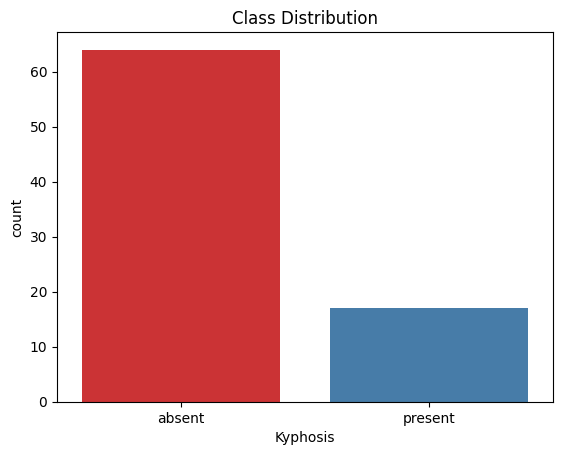

In [6]:
sns.countplot(data=KYPHOSIS_DF, x="Kyphosis", hue="Kyphosis", palette="Set1")

plt.title("Class Distribution")
plt.show()

### Correlation Heatmap

**Correlation Heatmap** is the visualization the strength and direction of relationships between features.

- **Correlation Value** is in range $[-1.0, 1.0]$ indicating strength of the correlation.
- **Positive Correlation**: As one variable increases, the other also increases.
- **Negative Correlation**: As one variable increases, the other decreases.
- **No Correlation**: There is no linear relationship between the variables.

Use `corr()` to calculate correlation, and `heatmap()` from `seaborn` library to plot heatmap.
- `data` is the `DataFrame` of the dataset.
- Set `annot` to `True` to display labels.
- `cmap` is the color map.

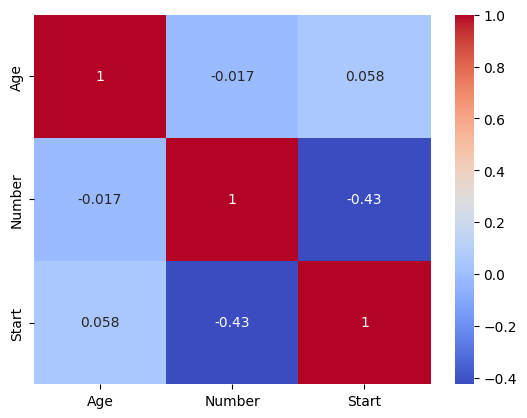

In [7]:
features = KYPHOSIS_DF.drop(columns=["Kyphosis"])
sns.heatmap(features.corr(), annot=True, cmap="coolwarm")

plt.show()

### Pair Plot

**Pair plot** is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset.

- **Histogram Plot** is on the diagonal line. It shows the distribution of a single features separated by target classes.
- **Scatter Plot** shows the relationship of two variables.

Use `pairplot()` from `seaborn` library to plot pair plot.
- `data` is the `DataFrame` of the dataset.
- `hue` is the target column.
- `palette` is the color palette of the bar.

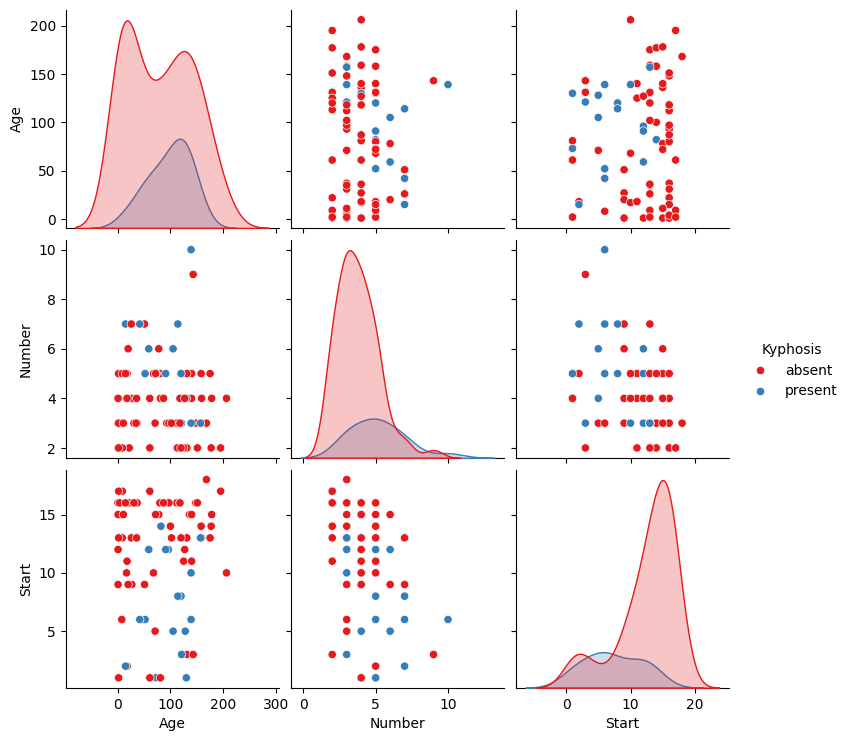

In [8]:
sns.pairplot(data=KYPHOSIS_DF, hue="Kyphosis", palette="Set1")

plt.show()

### Interpretation

**Class Imbalance**: The dataset has 64 `absent` class (79%), but only 17 `present` class (21%).

**Features Relationship**: According to the correlation heatmap and pair plot
- `Age` has no linear correlation to any features.
- Only `Number` and `Start` features have notable negative linear correlation.

**Overlapping**: The classes overlap significantly in the feature space.

## Split Dataset

First, we separate the original `DataFrame` into 2 `DataFrame`.
- `X` is the features `DataFrame` which are all column except the `Kyphosis` column.
- `y` is the target `DataFrame` which is only `Kyphosis` column.

In [9]:
X = KYPHOSIS_DF.drop(columns=["Kyphosis"])
y = KYPHOSIS_DF["Kyphosis"]

Then, split the dataset into train dataset and test dataset by ratio `7:3`:
- **Train dataset** (70% of the dataset) uses for training the model.
- **Test dataset** (30% of the dataset) uses for testing the model.

**Stratification** can ensure that both train datasets and test dataset have the same `absent` and `present` proportions.

To split dataset, use `train_test_split()` function from `sklearn.model_selection`.
- `test_size` is the percentage of test dataset.
- `random_state` is random seed for ensuring the same result when running the code.
- Pass target to `stratify` parameter.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=30, stratify=y
)

Display `X_train` which is features for train dataset.

In [11]:
X_train.head(10)

,Age,Number,Start
19,27,4,9
61,114,7,8
51,9,2,17
24,15,7,2
56,2,3,13
48,121,3,3
35,93,3,16
16,78,6,15
72,87,4,16
71,127,4,12


Display `X_test` which is features for test dataset.

In [12]:
X_test.head(10)

,Age,Number,Start
45,139,3,10
40,73,5,1
67,159,4,13
68,18,4,11
3,2,5,1
29,151,2,16
47,131,5,13
44,97,3,16
70,158,5,14
15,1,3,16


Display amount of rows of train dataset and test dataset.

In [13]:
train_dataset_rows = X_train.shape[0]
train_dataset_cols = X_train.shape[1]

test_dataset_rows = X_test.shape[0]
test_dataset_cols = X_test.shape[1]

print(
    f"- The train dataset has {train_dataset_rows} rows and {train_dataset_cols} columns."
)
print(
    f"- The test dataset has {test_dataset_rows} rows and {test_dataset_cols} columns."
)

- The train dataset has 56 rows and 3 columns.
- The test dataset has 25 rows and 3 columns.


# **Task 1:** Decision Tree

**Decision Tree** is a flowchart-like tree used for making decisions or predictions. It breaks down a complex decision into a series of questions eventually leading to a final answer.

## Adjust Parameters

**Parameters Details**
- `criterion` is the decision tree splitting measurement (`gini` or `entropy`).
- `max_depth` is the maximum depth of decision tree.
- `min_samples_split` is the minimum sample data required to split a node.
- `min_samples_leaf` is the minimum sample data in one leaf node.
- `ccp_alpha` is the regularization weight for pruning a tree.

Why choosing these parameters? Please read [here](#choosing-parameters-on-decision-tree)

In [14]:
CRITERION = "gini"
MAX_DEPTH = 3
MIN_SAMPLES_SPLIT = 16
MIN_SAMPLES_LEAF = 8
CCP_ALPHA = 0.01

## Decision Tree Model

Training a decision tree model by using train dataset and adjusted parameters.

In [15]:
model = DecisionTreeClassifier(
    criterion=CRITERION,
    max_depth=MAX_DEPTH,
    min_samples_split=MIN_SAMPLES_SPLIT,
    min_samples_leaf=MIN_SAMPLES_LEAF,
    ccp_alpha=CCP_ALPHA,
)

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, min_samples_leaf=8,
                       min_samples_split=16)

## Tree Visualization

**Parameters Details**
- `feature_names` is the name of the features. This makes the visualization shows the actual feature names instead of `X[0]` or `X[1]`.
- `class_names` is the classes of the target.
- `filled=True` means each node will be filled with color.
- `rounded=True` means each node will have its corner rounded.

In [17]:
# Matplotlib Configuration
FIGURE_SIZE = (6, 10)

# Tree Plot Configuration
FEATURE_NAMES = X_train.columns
CLASS_NAMES = y_train.unique().tolist()
FILLED = True
ROUNDED = True

Use `plot_tree` for decision tree visualization.

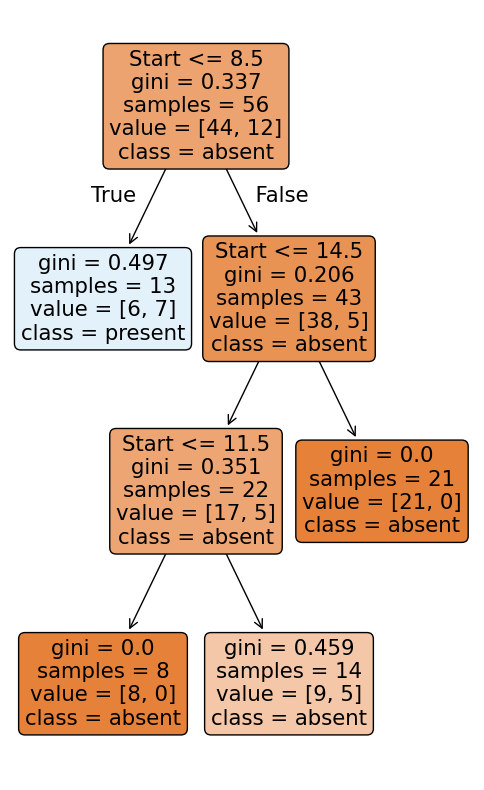

In [18]:
plt.figure(figsize=FIGURE_SIZE)

plot_tree(
    model,
    feature_names=FEATURE_NAMES,
    class_names=CLASS_NAMES,
    filled=FILLED,
    rounded=ROUNDED,
)

plt.show()

## Model Prediction

Apply test data to the trained model.
- `model` is the trained model from the previous
- `X_test` is the features (input) of the test dataset.
- `y_test` is the ground truth (output) of the test dataset, uses for evaluate the model.

In [19]:
predictions = model.predict(X_test)

## Model Evaluation

### Confusion matrix

Given `absent` is the `positive` class, and `present` is `negative` class.
- **True Positive (TP)** means predicted `positive`, actual `positive`.
- **False Positive (FP)** means predicted `positive`, actual `negative`.
- **True Negative (TN)** means predicted `negative`, actual `negative`.
- **False Negative (FN)** means predicted `negative`, actual `positive`.

**NOTE:** `cmap` parameter is the color map of the visualization.

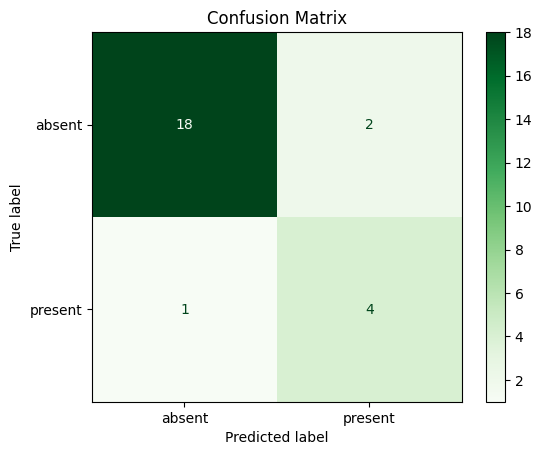

In [20]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test, predictions, cmap=plt.cm.Greens
)

plt.title("Confusion Matrix")
plt.show()

### Classification Report

**Class Metrics**
- **Precision** is the proportions of true positive (TP) by total positive predictions.
- **Recall** is the proportions of true positive (TP) by total actual positive.
- **Support** is the amount of actual data in the class.
- **F1 Score** is the harmonic mean of **Precision** and **Recall**

**Overall Metrics**
- **Accuracy** is the proportions of correct predictions by total predictions.
- **Macro F1 Score** is mean of per-class F1 score.
- **Weight Average F1 Score** is mean of per-class F1 score weighted by each class's support.

NOTE: `digits` parameter is the decimal places to display.

In [21]:
report = classification_report(y_test, predictions, digits=4)

print(report)

              precision    recall  f1-score   support

      absent     0.9474    0.9000    0.9231        20
     present     0.6667    0.8000    0.7273         5

    accuracy                         0.8800        25
   macro avg     0.8070    0.8500    0.8252        25
weighted avg     0.8912    0.8800    0.8839        25



## Choosing Parameters on Decision Tree

Choose `criterion` to `gini` instead of `entropy`:
- Choosing **Gini Impurity** to decide how to split the data.
- **Gini Impurity** often works better on imbalanced data.
- **Gini Impurity** tends to isolating the most frequent class first.

Choose `max_depth` to `3`:
- Limits the decision tree to growing only 3 levels deep.
- Prevents over-fitting which occurred when the decision tree has too many level.

Choose `max_samples_split` to `16`:
- Requires 16 samples to split a node.
- Prevents the decision tree model for making rules based only small clusters.

Choose `max_samples_leaf` to `8`:
- Every leaf node must have at least 8 samples.
- Prevents the decision tree model for making rules just for a tiny cluster.

Choose `ccp_alpha` to `0.01`:
- **Cost Complexity Pruning** uses for pruning too-complex decision tree.
- Prevents branching when it is just slightly improve the purity.

# **Task 2:** Random Forest

**Random Forest** is a technique that create multiple decision trees from a different random sample of the original dataset with random features.
- **Classification** uses the majority of votes from the forest of decision trees.
- **Regression** uses the average value from the forest of decision trees.

## Adjust Parameters

**Parameters Details**
- `n_estimators` is the amount of decision trees generated.
- `criterion` is the decision tree splitting measurement (`gini` or `entropy`).
- `max_depth` is the maximum depth of decision tree.
- `min_samples_split` is the minimum sample data required to split a node.
- `min_samples_leaf` is the minimum sample data in one leaf node.
- `max_features` is the maximum amount of columns (features) used for each decision tree.
- `ccp_alpha` is the regularization weight for pruning a tree.
- `max_samples` is the maximum amount of rows used for each decision tree.

Why choosing these parameters? Please read [here]()

In [22]:
N_ESTIMATORS = 100
CRITERION = "gini"
MAX_DEPTH = 3
MIN_SAMPLES_SPLIT = 8
MIN_SAMPLES_LEAF = 4
MAX_FEATURES = 2
RANDOM_STATE = 32820
CCP_ALPHA = 0.01
MAX_SAMPLES = 40

## Random Forest Model

Training a random forest model by using train dataset and adjusted parameters.

In [23]:
model = RandomForestClassifier(
    n_estimators=N_ESTIMATORS,
    criterion=CRITERION,
    max_depth=MAX_DEPTH,
    min_samples_split=MIN_SAMPLES_SPLIT,
    min_samples_leaf=MIN_SAMPLES_LEAF,
    max_features=MAX_FEATURES,
    random_state=RANDOM_STATE,
    ccp_alpha=CCP_ALPHA,
    max_samples=MAX_SAMPLES,
)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.01, max_depth=3, max_features=2,
                       max_samples=40, min_samples_leaf=4, min_samples_split=8,
                       random_state=32820)

## Tree Visualization

**Parameters Details**
- `feature_names` is the name of the features. This makes the visualization shows the actual feature names instead of `X[0]` or `X[1]`.
- `class_names` is the classes of the target.
- `filled=True` means each node will be filled with color.
- `rounded=True` means each node will have its corner rounded.

In [25]:
# Matplotlib Configuration
FIGURE_SIZE = (6, 10)

# Tree Plot Configuration
FEATURE_NAMES = X_train.columns
CLASS_NAMES = y_train.unique().tolist()
FILLED = True
ROUNDED = True

Get 2 example trees from a random forest.

In [26]:
example_tree_01 = model.estimators_[0]
example_tree_02 = model.estimators_[4]

Display the first example tree.

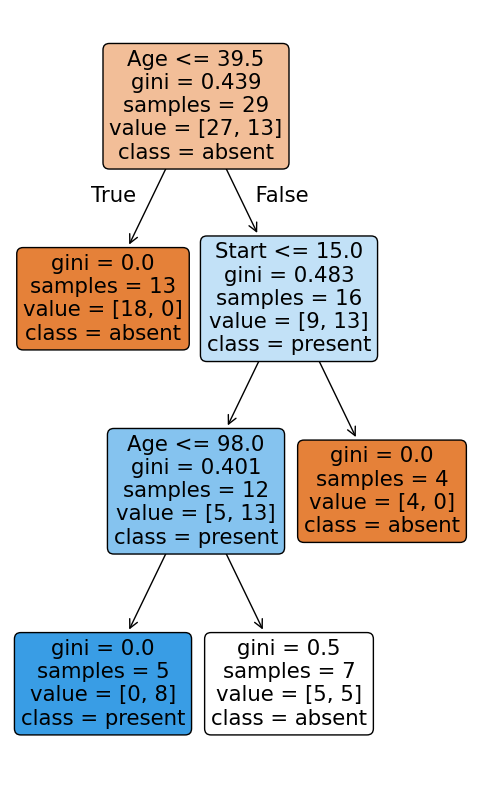

In [27]:
plt.figure(figsize=FIGURE_SIZE)

plot_tree(
    example_tree_01,
    feature_names=FEATURE_NAMES,
    class_names=CLASS_NAMES,
    filled=FILLED,
    rounded=ROUNDED,
)

plt.show()

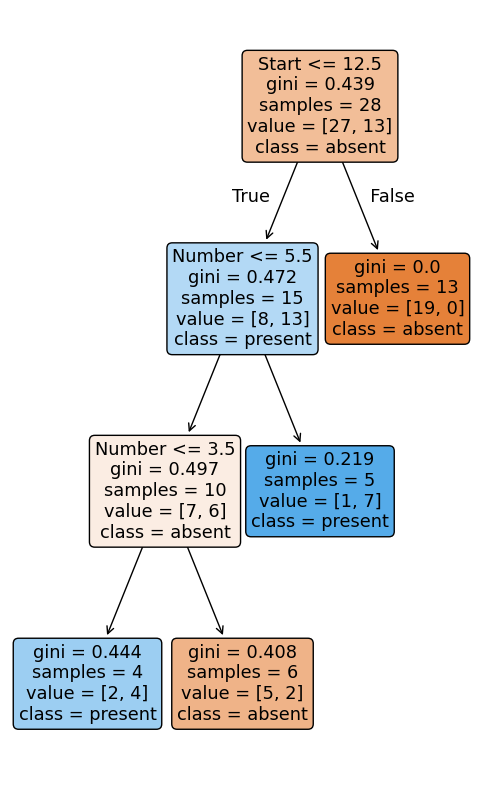

In [28]:
plt.figure(figsize=FIGURE_SIZE)

plot_tree(
    example_tree_02,
    feature_names=FEATURE_NAMES,
    class_names=CLASS_NAMES,
    filled=FILLED,
    rounded=ROUNDED,
)

plt.show()

## Model Prediction

Apply test data to the trained model.
- `model` is the trained model from the previous
- `X_test` is the features (input) of the test dataset.
- `y_test` is the ground truth (output) of the test dataset, uses for evaluate the model.

In [29]:
predictions = model.predict(X_test)

## Model Evaluation

### Confusion matrix

Given `absent` is the `positive` class, and `present` is `negative` class.
- **True Positive (TP)** means predicted `positive`, actual `positive`.
- **False Positive (FP)** means predicted `positive`, actual `negative`.
- **True Negative (TN)** means predicted `negative`, actual `negative`.
- **False Negative (FN)** means predicted `negative`, actual `positive`.

**NOTE:** `cmap` parameter is the color map of the visualization.

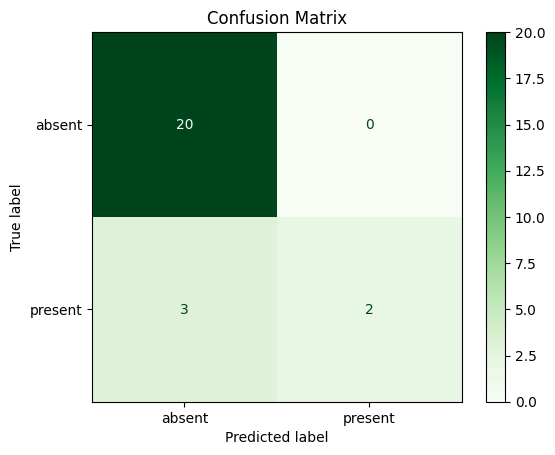

In [30]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test, predictions, cmap=plt.cm.Greens
)

plt.title("Confusion Matrix")
plt.show()

### Classification Report

**Class Metrics**
- **Precision** is the proportions of true positive (TP) by total positive predictions.
- **Recall** is the proportions of true positive (TP) by total actual positive.
- **Support** is the amount of actual data in the class.
- **F1 Score** is the harmonic mean of **Precision** and **Recall**

**Overall Metrics**
- **Accuracy** is the proportions of correct predictions by total predictions.
- **Macro F1 Score** is mean of per-class F1 score.
- **Weight Average F1 Score** is mean of per-class F1 score weighted by each class's support.

NOTE: `digits` parameter is the decimal places to display.

In [31]:
report = classification_report(y_test, predictions, digits=4)

print(report)

              precision    recall  f1-score   support

      absent     0.8696    1.0000    0.9302        20
     present     1.0000    0.4000    0.5714         5

    accuracy                         0.8800        25
   macro avg     0.9348    0.7000    0.7508        25
weighted avg     0.8957    0.8800    0.8585        25



## Choosing Parameters on Random Forest

Choose `n_estimators` to `100`:
- Create 100 different decision tree to vote a result.

Choose `criterion` to `gini` instead of `entropy`:
- Choose **Gini Impurity** to decide how to split the data.
- **Gini Impurity** often works better on imbalanced data.
- **Gini Impurity** tends to isolating the most frequent class first.

Choose `max_depth` to `3`:
- Limit the decision tree to growing only 3 levels deep.
- Prevents over-fitting which occurred when the decision tree has too many level.

Choose `max_samples_split` to `8`:
- Require 8 samples to split a node.
- Prevents the decision tree model for making rules based only small clusters.

Choose `max_samples_leaf` to `4`:
- Every leaf node must have at least 4 samples.
- Prevents the decision tree model for making rules just for a tiny cluster.

Choose `max_features` to `2`:
- Choose only 2 features when sampling the data.
- This makes the dataset more vary which makes the each decision tree different.

Choose `random_state` to `32830`:
- Fix the random seed to ensure the same result when executing the code.

Choose `ccp_alpha` to `0.01`:
- **Cost Complexity Pruning** uses for pruning too-complex decision tree.
- Prevent branching when it is just slightly improve the purity.

Choose `max_samples` to `50`:
- Choose only 50 rows when sampling the data.
- This makes the dataset more vary which makes the each decision tree different.